# Python for Data Analysis - part9

##### Python의 numpy, pandas 등을 정리하였으며 파이썬 라이브러리를 활용한 데이터분석(2판)을 참고하여 작성하였습니다.
##### 해당 자료는 python 3.6 기반으로 작성되었습니다.

## 9. 그래프와 시각화

In [3]:
# 주피터 노트북의 대화형 시각화 기능
%matplotlib inline

### 9.1 matplotlib API 간략하게 살펴보기

[0 1 2 3 4 5 6 7 8 9]
-----------------------------------------


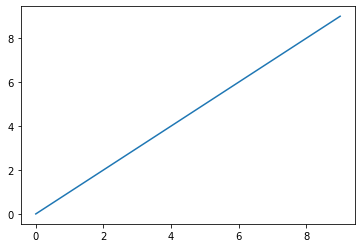

In [4]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)
print(data)
print("-----------------------------------------")

plt.plot(data)

#### 9.1.1 figure와 서브플롯

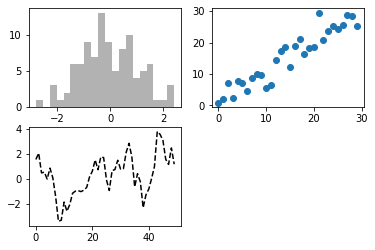

In [8]:
# plt.figure() - figure 객체 생성, 그래프는 figure 객체 내에 존재
fig = plt.figure()

# add_subplot() - subplots 생성
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--') # 'k--' : 검은 점선

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
-----------------------------------------


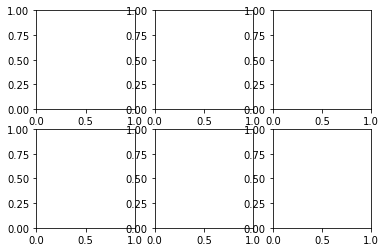

In [10]:
# plt.subplots() - 특정 배치에 맞추어 여러개의 서브플롯을 포함하는 figure 생성
fig, axes = plt.subplots(2,3)
print(axes)
print("-----------------------------------------")

#### plt.subplots 옵션 - nrows(서브플롯 로우 수), ncols(서브플롯 칼럼 수), sharex(모든 서브플롯이 같은 x축 눈금 사용), sharey(모든 서브플롯이 같은 y축 눈금 사용), subplot_kw(add_subplot을 사용해서 각 서브플롯을 생성할 때 사용할 키워드를 담고 있는 사전)

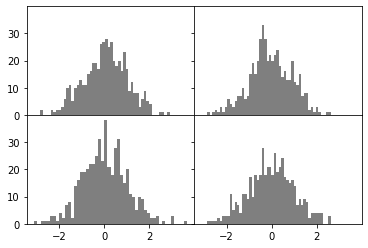

In [11]:
# subplots_adjust - 서브플롯 간의 간격 조절
fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color = 'k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

#### 9.1.2 색상, 마커, 선 스타일

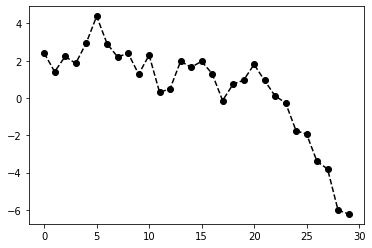

In [13]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

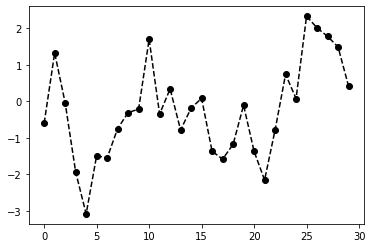

In [14]:
plt.plot(randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

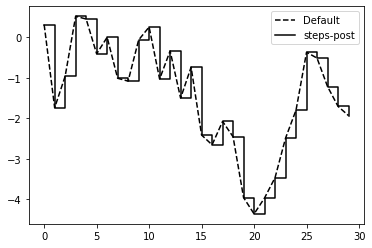

In [16]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label = 'Default')
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

#### 9.1.3 눈금, 라벨, 범례

Text(0.5, 0, 'stages')

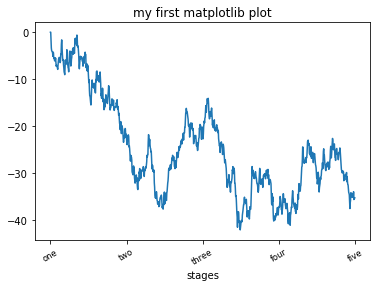

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

# set_xticks - x축 눈금 위치 지정 / set_xticklabels - x축 눈금 이름
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize = 'small')

# set_xlabel - x축 이름 지정 / set_title - 제목
ax.set_title('my first matplotlib plot')
ax.set_xlabel('stages')

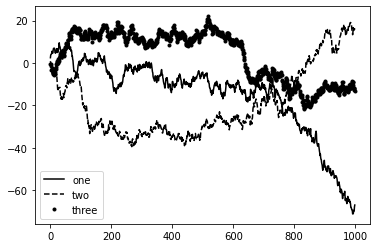

In [20]:
# 범례 추가하기 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best')

#### 9.1.4 주석과 그림 추가하기

Text(0.5, 1.0, 'important dates in the 2008-2009 financial crisis')

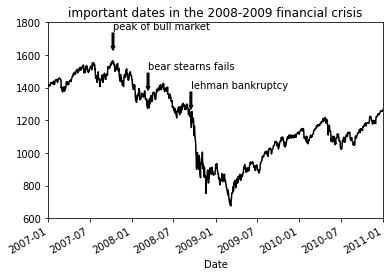

In [24]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('examples/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']
spx.plot(ax = ax, style = 'k-')

crisis_date = [(datetime(2007, 10, 11), 'peak of bull market'), 
              (datetime(2008, 3, 12), 'bear stearns fails'), 
              (datetime(2008, 9, 15), 'lehman bankruptcy')]

# ax.annotate - x, y 좌표로 지정한 위치에 라벨 추가
for date, label in crisis_date:
    ax.annotate(label, xy = (date, spx.asof(date) + 75), xytext = (date, spx.asof(date) + 255), 
               arrowprops=dict(facecolor = 'black', headwidth=4, width=2, headlength=4), 
               horizontalalignment = 'left', verticalalignment = 'top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600 ,1800])
ax.set_title('important dates in the 2008-2009 financial crisis')

#### 9.1.5 그래프를 파일로 저장하기
#### - 활성화된 figure는 plt.savefig 메서드를 활용해서 저장

### 9.2 pandas에서 seaborn으로 그래프 그리기

#### 9.2.1 선그래프

<AxesSubplot:>

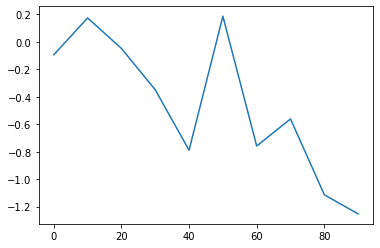

In [25]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

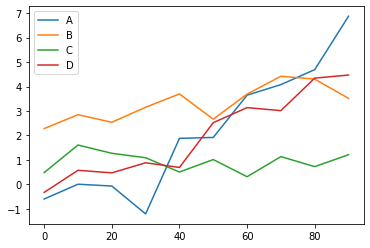

In [27]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns = ['A', 'B', 'C', 'D'],
                 index = np.arange(0, 100, 10))
df.plot()

#### series.plot 인자 - label(범례 이름), ax(그래프를 그릴 matplotlib의 서브플롯 객체), style(스타일 문자열), alpha(투명도), kind(그래프 종류), logy(y축에 대한 로그 스케일링), use_index(객체의 색인을 눈금 이름으로 사용할 지 여부), rot(눈금 이름 회전), xticks(x축으로 사용할 값), yticks(y축으로 사용할 값), xlim(x축 범위), ylim(y축 범위), grid(그리드 표시 여부)

#### 9.2.2 막대그래프

<AxesSubplot:>

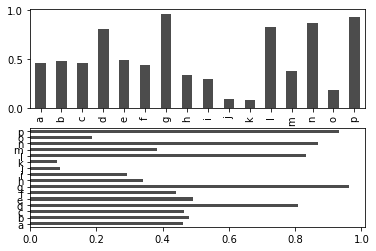

In [28]:
fix, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)
data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7)

genus         A         B         C         D
one   -1.414381 -0.356370 -0.809728 -1.708929
two   -0.311420 -0.729978 -0.752473  0.109159
three -0.110920  0.659404  1.744164 -0.096453
four   1.575843 -1.069026 -0.094408  1.028497
five   0.310045  1.210845 -1.019816 -1.099331
six   -0.583664  0.039702 -0.161867  0.470181
--------------------------------


<AxesSubplot:>

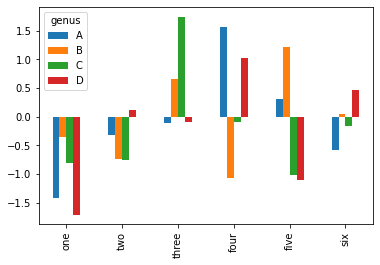

In [29]:
df = pd.DataFrame(np.random.randn(6,4), index = ['one', 'two', 'three', 'four', 'five', 'six'], 
                 columns = pd.Index(['A', 'B', 'C', 'D'], name = 'genus'))

print(df)
print('--------------------------------')

df.plot.bar()

<AxesSubplot:>

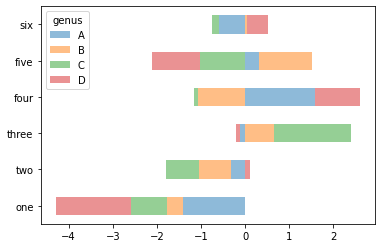

In [30]:
# stacked = True - 누적막대그래프
df.plot.barh(stacked = True, alpha = 0.5)

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3
-------------------------
size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241
--------------------------


<AxesSubplot:xlabel='day'>

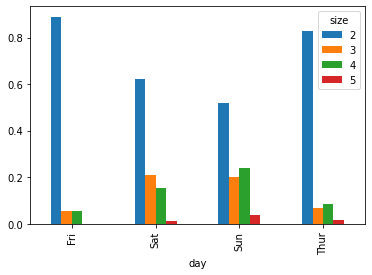

In [33]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])

print(party_counts)
print('-------------------------')

party_counts = party_counts.loc[:, 2:5]

# 합이 1이되도록 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)
print(party_pcts)
print('--------------------------')

party_pcts.plot.bar()

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069
--------------------------


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

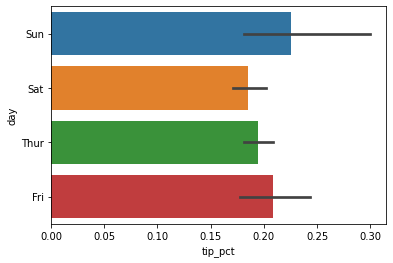

In [34]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

print(tips.head())
print('--------------------------')

sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

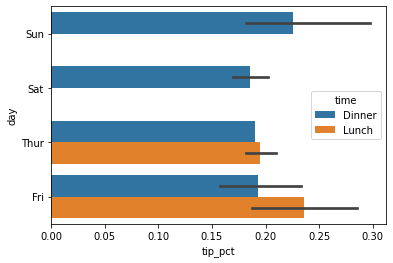

In [35]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', data = tips, orient = 'h')

#### 9.2.3 히스토그램과 밀도 그래프

<AxesSubplot:ylabel='Frequency'>

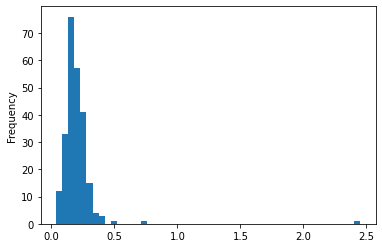

In [37]:
# 히스토그램
tips['tip_pct'].plot.hist(bins = 50)

<AxesSubplot:ylabel='Density'>

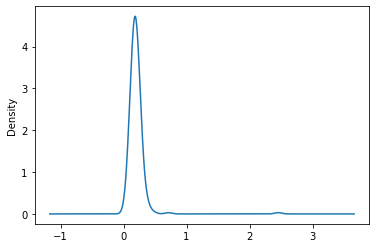

In [38]:
# 밀도 그래프(kde 그래프)
tips['tip_pct'].plot.density()

/Users/qook/Python/3.6/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

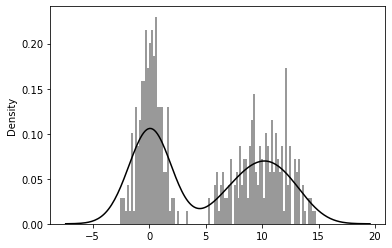

In [41]:
# sns.distplot - 히스토그램 + 밀도그래프
comp1 = np.random.normal(0,1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins = 100, color = 'k')

#### 9.2.4 산포도

          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560
--------------------------


/Users/qook/Python/3.6/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'changes in log m1 versus log unemp')

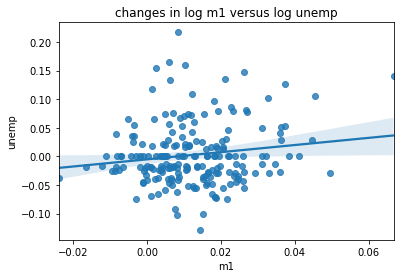

In [43]:
# sns.regplot - 산포도 + 선형회귀곡선

macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
print(trans_data[-5:])
print('--------------------------')

sns.regplot('m1', 'unemp', data = trans_data)
plt.title('changes in log %s versus log %s' %('m1', 'unemp'))

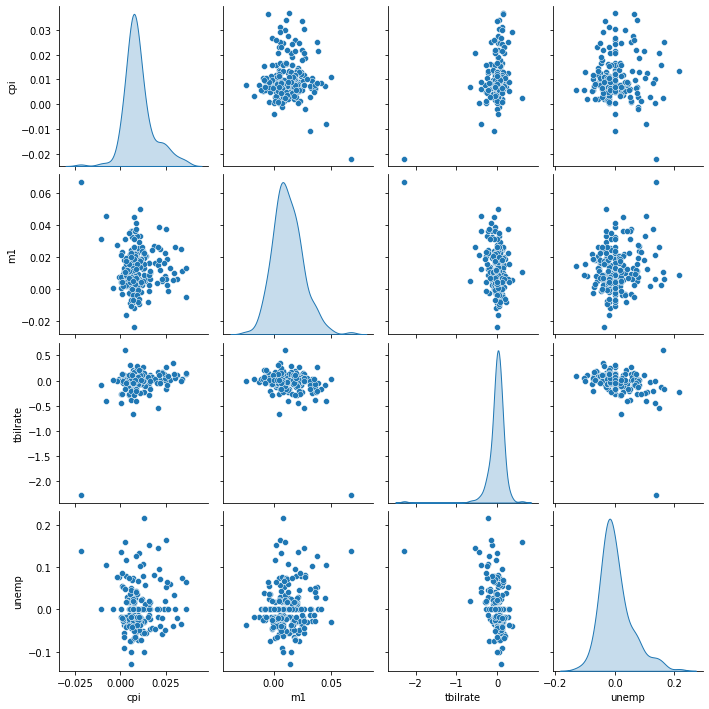

In [45]:
# sns.pairplot - 산포도 행렬
sns.pairplot(trans_data, diag_kind = 'kde')

#### 9.2.5 패싯 그리드와 범주형 데이터

/Users/qook/Python/3.6/venv/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


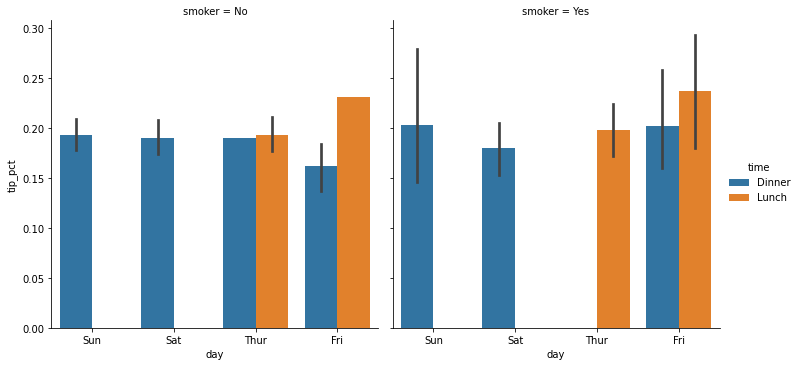

In [46]:
# sns.factorplot - 다양한 면을 나타내는 그래프
sns.factorplot(x = 'day', y = 'tip_pct', hue = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip_pct <1])

/Users/qook/Python/3.6/venv/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


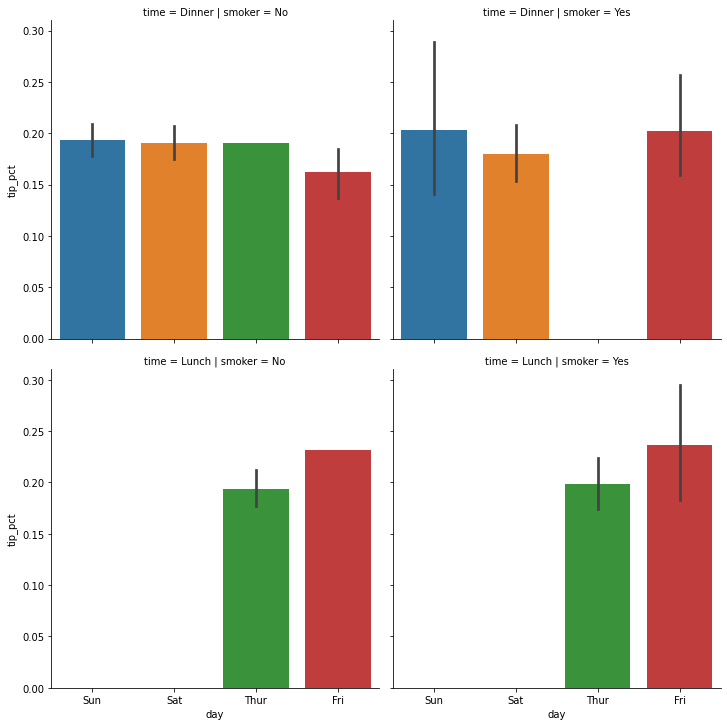

In [47]:
sns.factorplot(x = 'day', y = 'tip_pct', row = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip_pct <1])

/Users/qook/Python/3.6/venv/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


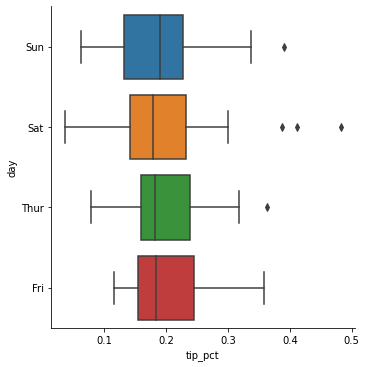

In [48]:
sns.factorplot(x = 'tip_pct', y = 'day', kind = 'box', data = tips[tips.tip_pct < 0.5])